In [1]:
import pandas as pd
import numpy as np

In [2]:
path = '../../data/gtd.csv'
df = pd.read_csv(path, encoding='ISO-8859-1')
print("Original DataFrame size:", len(df))
df = df.loc[(df['iyear'] != 0) & (df['imonth'] != 0) & (df['iday'] != 0)]
df = df[(df["gname"] != 'Unknown')]
df = df[df['weaptype1_txt'] != 'Unknown']
print("Filtered DataFrame size:", len(df))


C:\Users\alexa\AppData\Local\Temp\ipykernel_11360\1460817492.py:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, encoding='ISO-8859-1')


Original DataFrame size: 181691
Filtered DataFrame size: 87500


In [3]:
partition1 = df[df['iyear'] <= 1980]
groups = partition1.groupby(['iyear', 'gname']).size().reset_index(name='count')
top5 = groups.groupby('gname')['count'].sum().nlargest(5).index
partition1 = df[df['iyear'] <= 1979]

top5
# Step 3: Filter the data to include only the top 10 groups
#filtered_counts = weapon_counts[weapon_counts['gname'].isin(top_groups)]

Index(['Irish Republican Army (IRA)', 'Basque Fatherland and Freedom (ETA)',
       'Palestinians', 'Protestant extremists',
       'Ulster Volunteer Force (UVF)'],
      dtype='object', name='gname')

In [4]:
partition1 = partition1[partition1['gname'].isin(top5)]
partition1 = partition1[partition1['gname'] != 'Palestinians']
partition1['gname'].value_counts()

gname
Irish Republican Army (IRA)            996
Basque Fatherland and Freedom (ETA)    383
Protestant extremists                  198
Ulster Volunteer Force (UVF)           168
Name: count, dtype: int64

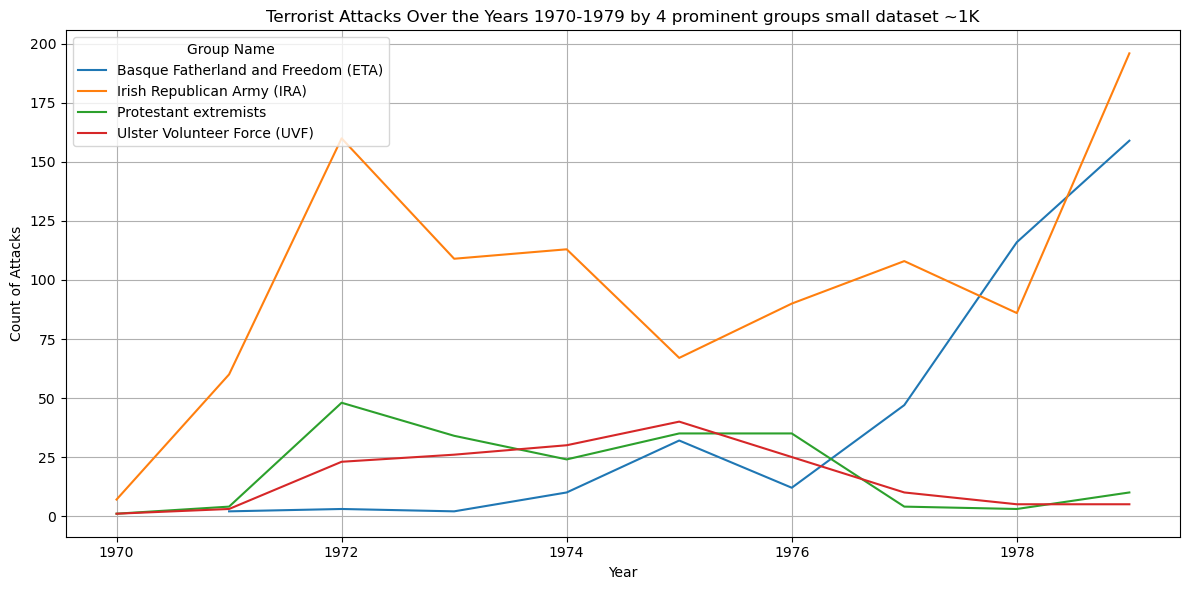

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Step 1: Group by 'iyear' and 'gname' and count the occurrences
weapon_counts = partition1.groupby(['iyear', 'gname']).size().reset_index(name='count')

# Step 2: Identify the top 10 most active groups
top_groups = weapon_counts.groupby('gname')['count'].sum().nlargest(5).index

# Step 3: Filter the data to include only the top 10 groups
filtered_counts = weapon_counts[weapon_counts['gname'].isin(top_groups)]

# Step 4: Pivot the table with filtered data
pivot_table = filtered_counts.pivot(index='iyear', columns='gname', values='count')

# Step 5: Create a figure for the line chart
fig, ax = plt.subplots(figsize=(12, 6))  # Adjusted for one plot

# Plotting the line chart
pivot_table.plot(kind='line', ax=ax)
ax.set_title('Terrorist Attacks Over the Years 1970-1979 by 4 prominent groups small dataset ~1K')
ax.set_xlabel('Year')
ax.set_ylabel('Count of Attacks')
ax.legend(title='Group Name', loc='upper left')
ax.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


In [6]:
groups = top5.delete(2)

def counts(dataframe, groups):
    total = 0
    for gname in groups:
        count = len(dataframe[dataframe['gname'] == gname])
        total += count
        print(f'{gname}: {count}')
    return total

# Call the function with the DataFrame and groups
total = counts(partition1, groups)
print('Total before downscaling:', total)


Irish Republican Army (IRA): 996
Basque Fatherland and Freedom (ETA): 383
Protestant extremists: 198
Ulster Volunteer Force (UVF): 168
Total before downscaling: 1745


In [7]:
trainset = partition1[(partition1['iyear'] <= 1975)]
len(trainset)

834

In [8]:
print(len(partition1))

1745


In [9]:
partitionsize = int(len(partition1))
print(partitionsize)
testsize = partitionsize - len(trainset)
testsize

1745


911

In [10]:
testset = partition1[(partition1['iyear'] > 1975)]
len(testset)

911

In [11]:
import pandas as pd

# Assuming your test set is called 'test_df'
eta_ira_df = testset[testset['gname'].isin(['Irish Republican Army (IRA)', 'Basque Fatherland and Freedom (ETA)'])]
non_eta_ira_df = testset[~testset['gname'].isin(['Irish Republican Army (IRA)', 'Basque Fatherland and Freedom (ETA)'])]

# Determine how much to downscale (e.g., keep 50% of the original)
downscale_factor = 0.1  # Adjust as needed
target_size = int(len(eta_ira_df) * downscale_factor)

# Stratified sampling based on key feature distributions
sampled_eta_ira_df = eta_ira_df.groupby(['weaptype1_txt', 'attacktype1_txt', 'city'], group_keys=False).apply(
    lambda x: x.sample(frac=downscale_factor, random_state=42) if len(x) > 1 else x
).reset_index(drop=True)

# Combine the reduced ETA/IRA data with the rest of the test set
downscaled_test_df = pd.concat([non_eta_ira_df, sampled_eta_ira_df], ignore_index=True)

# Verify new class distribution
print(downscaled_test_df['gname'].value_counts())  # Check proportion
print(len(downscaled_test_df))


gname
Irish Republican Army (IRA)            139
Basque Fatherland and Freedom (ETA)    132
Protestant extremists                   52
Ulster Volunteer Force (UVF)            45
Name: count, dtype: int64
368


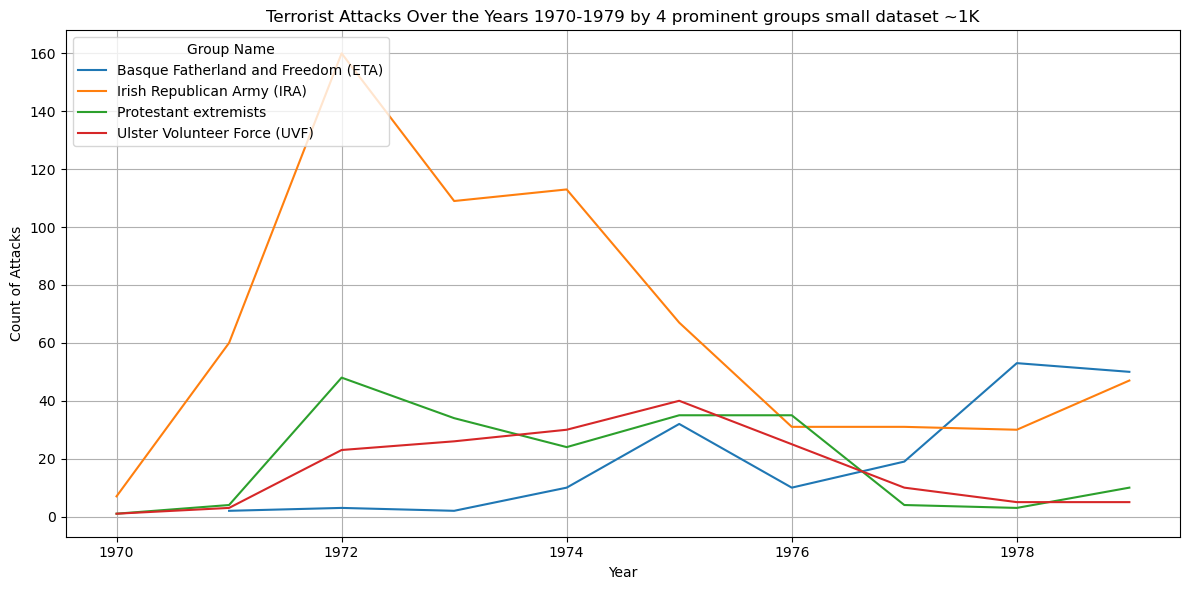

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
new = pd.concat([trainset, downscaled_test_df], ignore_index=True)
# Step 1: Group by 'iyear' and 'gname' and count the occurrences
weapon_counts = new.groupby(['iyear', 'gname']).size().reset_index(name='count')

# Step 2: Identify the top 10 most active groups
top_groups = weapon_counts.groupby('gname')['count'].sum().nlargest(5).index

# Step 3: Filter the data to include only the top 10 groups
filtered_counts = weapon_counts[weapon_counts['gname'].isin(top_groups)]

# Step 4: Pivot the table with filtered data
pivot_table = filtered_counts.pivot(index='iyear', columns='gname', values='count')

# Step 5: Create a figure for the line chart
fig, ax = plt.subplots(figsize=(12, 6))  # Adjusted for one plot

# Plotting the line chart
pivot_table.plot(kind='line', ax=ax)
ax.set_title('Terrorist Attacks Over the Years 1970-1979 by 4 prominent groups small dataset ~1K')
ax.set_xlabel('Year')
ax.set_ylabel('Count of Attacks')
ax.legend(title='Group Name', loc='upper left')
ax.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


In [13]:
total_downscaled = counts(new, groups)
print('Total after downscaling: ', total_downscaled)

Irish Republican Army (IRA): 655
Basque Fatherland and Freedom (ETA): 181
Protestant extremists: 198
Ulster Volunteer Force (UVF): 168
Total after downscaling:  1202


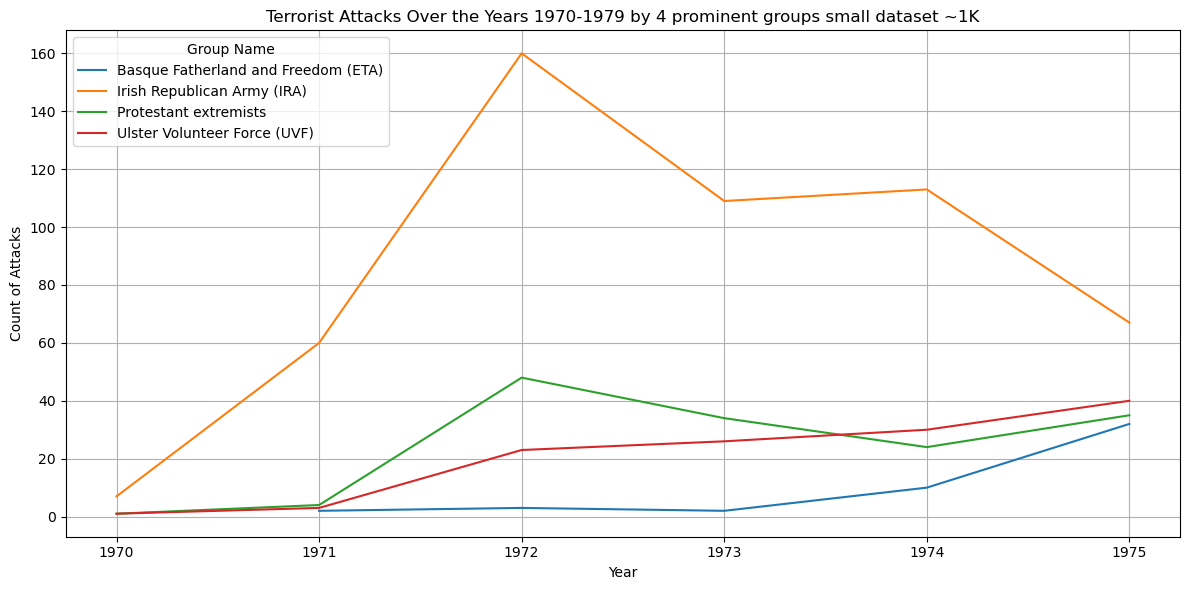

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Step 1: Group by 'iyear' and 'gname' and count the occurrences
weapon_counts = trainset.groupby(['iyear', 'gname']).size().reset_index(name='count')

# Step 2: Identify the top 10 most active groups
top_groups = weapon_counts.groupby('gname')['count'].sum().nlargest(5).index

# Step 3: Filter the data to include only the top 10 groups
filtered_counts = weapon_counts[weapon_counts['gname'].isin(top_groups)]

# Step 4: Pivot the table with filtered data
pivot_table = filtered_counts.pivot(index='iyear', columns='gname', values='count')

# Step 5: Create a figure for the line chart
fig, ax = plt.subplots(figsize=(12, 6))  # Adjusted for one plot

# Plotting the line chart
pivot_table.plot(kind='line', ax=ax)
ax.set_title('Terrorist Attacks Over the Years 1970-1979 by 4 prominent groups small dataset ~1K')
ax.set_xlabel('Year')
ax.set_ylabel('Count of Attacks')
ax.legend(title='Group Name', loc='upper left')
ax.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


In [15]:
total_downscaled_train = counts(trainset, groups)
print('Total after downscaling: ', total_downscaled_train)

Irish Republican Army (IRA): 516
Basque Fatherland and Freedom (ETA): 49
Protestant extremists: 146
Ulster Volunteer Force (UVF): 123
Total after downscaling:  834


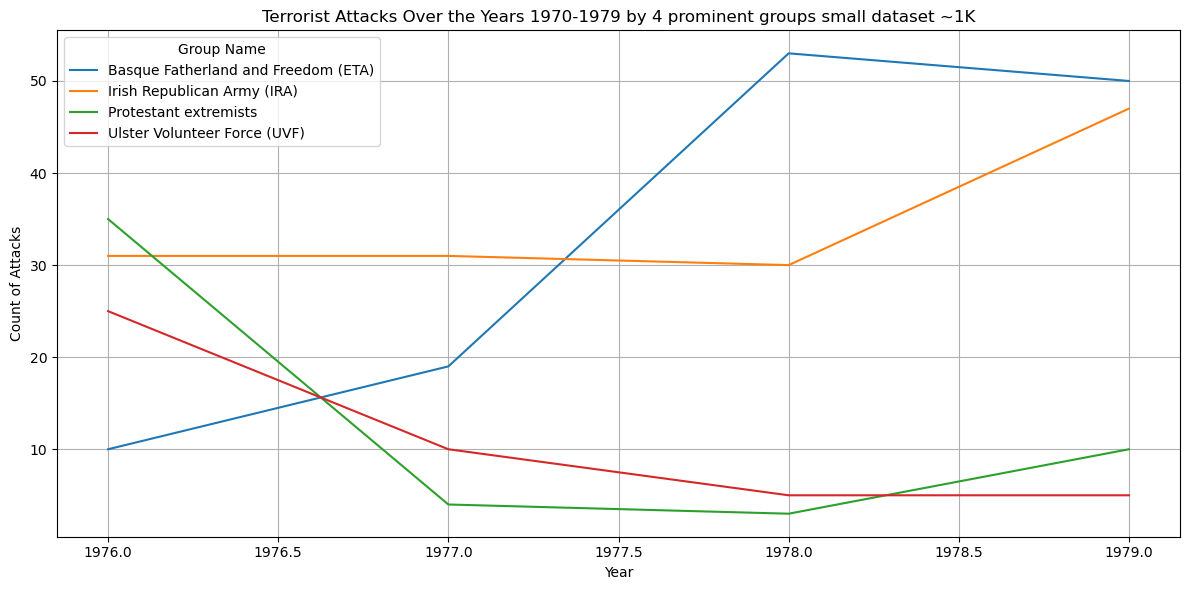

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Step 1: Group by 'iyear' and 'gname' and count the occurrences
weapon_counts = downscaled_test_df.groupby(['iyear', 'gname']).size().reset_index(name='count')

# Step 2: Identify the top 10 most active groups
top_groups = weapon_counts.groupby('gname')['count'].sum().nlargest(5).index

# Step 3: Filter the data to include only the top 10 groups
filtered_counts = weapon_counts[weapon_counts['gname'].isin(top_groups)]

# Step 4: Pivot the table with filtered data
pivot_table = filtered_counts.pivot(index='iyear', columns='gname', values='count')

# Step 5: Create a figure for the line chart
fig, ax = plt.subplots(figsize=(12, 6))  # Adjusted for one plot

# Plotting the line chart
pivot_table.plot(kind='line', ax=ax)
ax.set_title('Terrorist Attacks Over the Years 1970-1979 by 4 prominent groups small dataset ~1K')
ax.set_xlabel('Year')
ax.set_ylabel('Count of Attacks')
ax.legend(title='Group Name', loc='upper left')
ax.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


In [17]:
total_downscaled_test = counts(downscaled_test_df, groups)
print('Total after downscaling: ', total_downscaled_test)

Irish Republican Army (IRA): 139
Basque Fatherland and Freedom (ETA): 132
Protestant extremists: 52
Ulster Volunteer Force (UVF): 45
Total after downscaling:  368


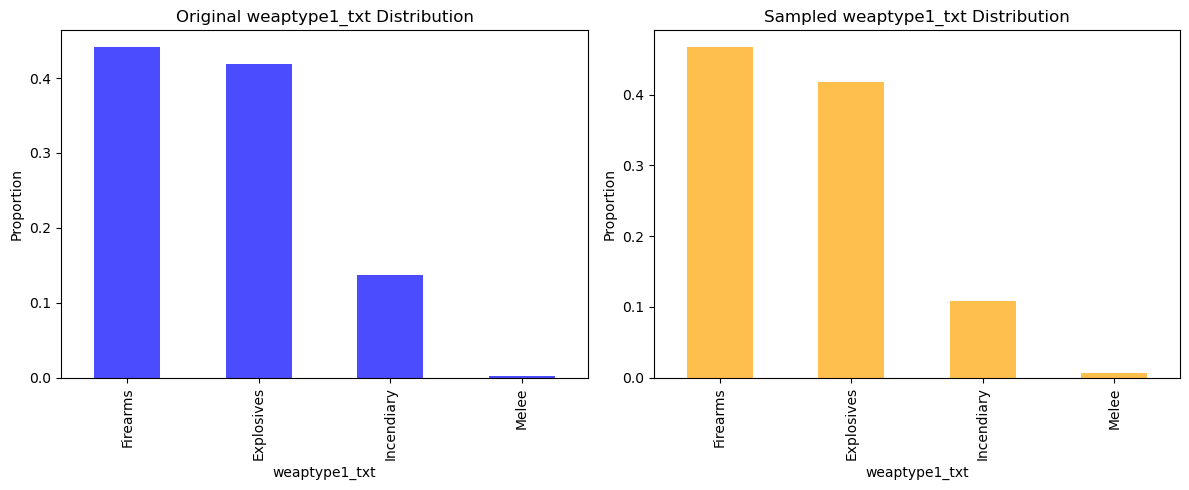

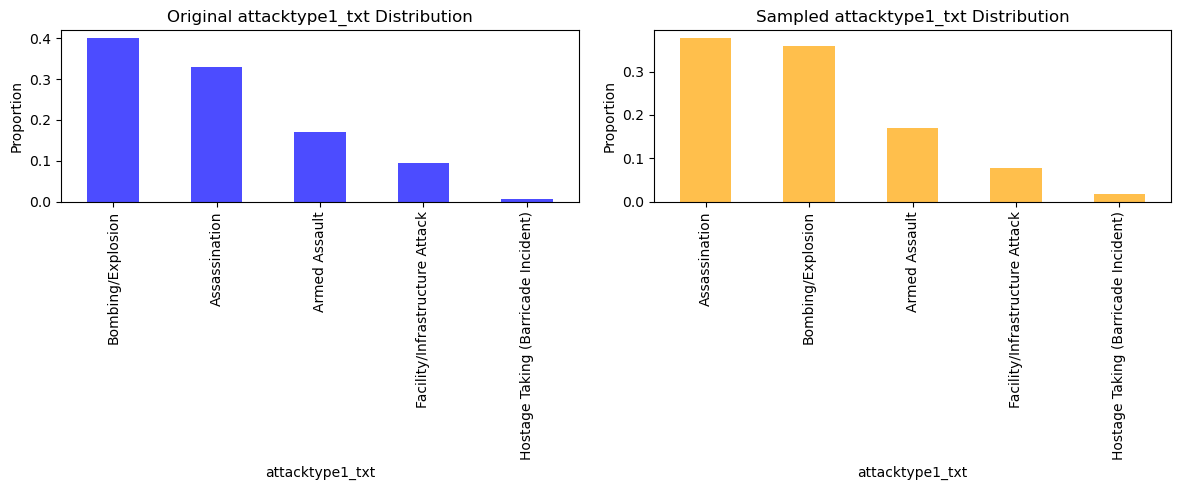

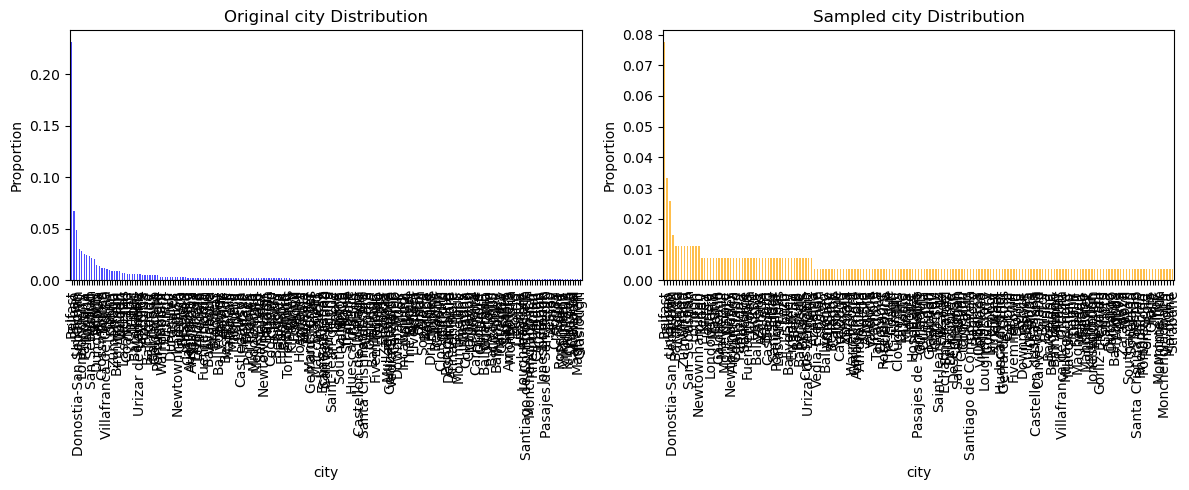

In [18]:
import matplotlib.pyplot as plt

def plot_distribution(feature, original_df, sampled_df):
    plt.figure(figsize=(12, 5))

    # Original Distribution
    plt.subplot(1, 2, 1)
    original_df[feature].value_counts(normalize=True).plot(kind='bar', color='blue', alpha=0.7)
    plt.title(f'Original {feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Proportion')

    # Sampled Distribution
    plt.subplot(1, 2, 2)
    sampled_df[feature].value_counts(normalize=True).plot(kind='bar', color='orange', alpha=0.7)
    plt.title(f'Sampled {feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Proportion')

    plt.tight_layout()
    plt.show()

# Plot distributions for the three key features
plot_distribution('weaptype1_txt', eta_ira_df[eta_ira_df['gname'] == 'Irish Republican Army (IRA)'], sampled_eta_ira_df[sampled_eta_ira_df['gname'] == 'Irish Republican Army (IRA)'])
plot_distribution('attacktype1_txt', eta_ira_df, sampled_eta_ira_df)
plot_distribution('city', eta_ira_df, sampled_eta_ira_df)
